In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data')

In [ ]:
import pandas as pd

In [ ]:
Data=pd.read_csv("Combined data.csv")

In [ ]:
Data.shape

(192446, 2)

In [ ]:
Data.head()

,text,label
0,Cocaine vs butthole 1v1 \n\n&amp;#x200B;\n\nWh...,not depressed
1,She seems so depressed lately and so so tired ...,anxiety
2,well hate every level nowi good day today firs...,mental
3,I have bipolar disorder and find myself hoppin...,bipolar disorder
4,I just wanna fuck a milf. Is that really so ba...,not depressed


In [ ]:
Data = Data.dropna(subset=['text'])

In [ ]:
Data.shape

(162580, 2)

Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

<ipython-input-15-c3a1f3546c7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=Data, palette='viridis', order=Data['label'].value_counts().index)


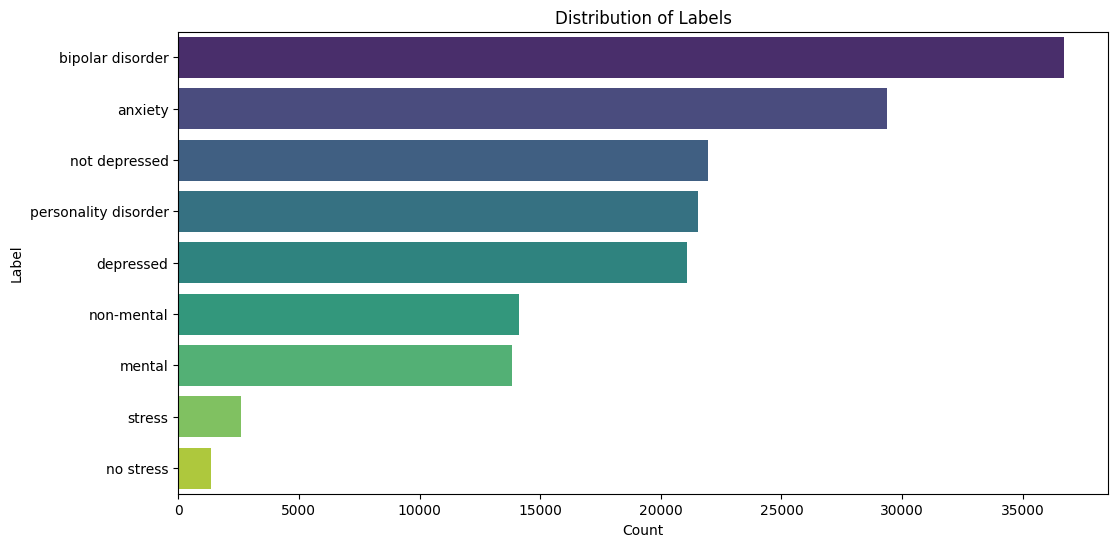

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=Data, palette='viridis', order=Data['label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [ ]:
print(Data['label'].value_counts())

label
bipolar disorder        36713
anxiety                 29364
not depressed           21950
personality disorder    21557
depressed               21078
non-mental              14139
mental                  13838
stress                   2587
no stress                1350
Name: count, dtype: int64


In [ ]:
!pip install matplotlib seaborn wordcloud

In [ ]:
Data = Data.dropna(subset=['text'])

In [ ]:
Data = Data[Data['text'].str.strip() != '']

In [ ]:
Data.shape

(162578, 2)

In [ ]:
Data.head()

,text,label
0,Cocaine vs butthole 1v1 \n\n&amp;#x200B;\n\nWh...,not depressed
1,She seems so depressed lately and so so tired ...,anxiety
2,well hate every level nowi good day today firs...,mental
3,I have bipolar disorder and find myself hoppin...,bipolar disorder
4,I just wanna fuck a milf. Is that really so ba...,not depressed


Label: not depressed, Length of text: 3709465
Label: anxiety, Length of text: 23950792
Label: mental, Length of text: 8555304
Label: bipolar disorder, Length of text: 26009286
Label: personality disorder, Length of text: 23584513
Label: depressed, Length of text: 9601004
Label: stress, Length of text: 1541081
Label: non-mental, Length of text: 4470106
Label: no stress, Length of text: 588735
Label: nan, Length of text: 0
Skipping label nan as it has no text.


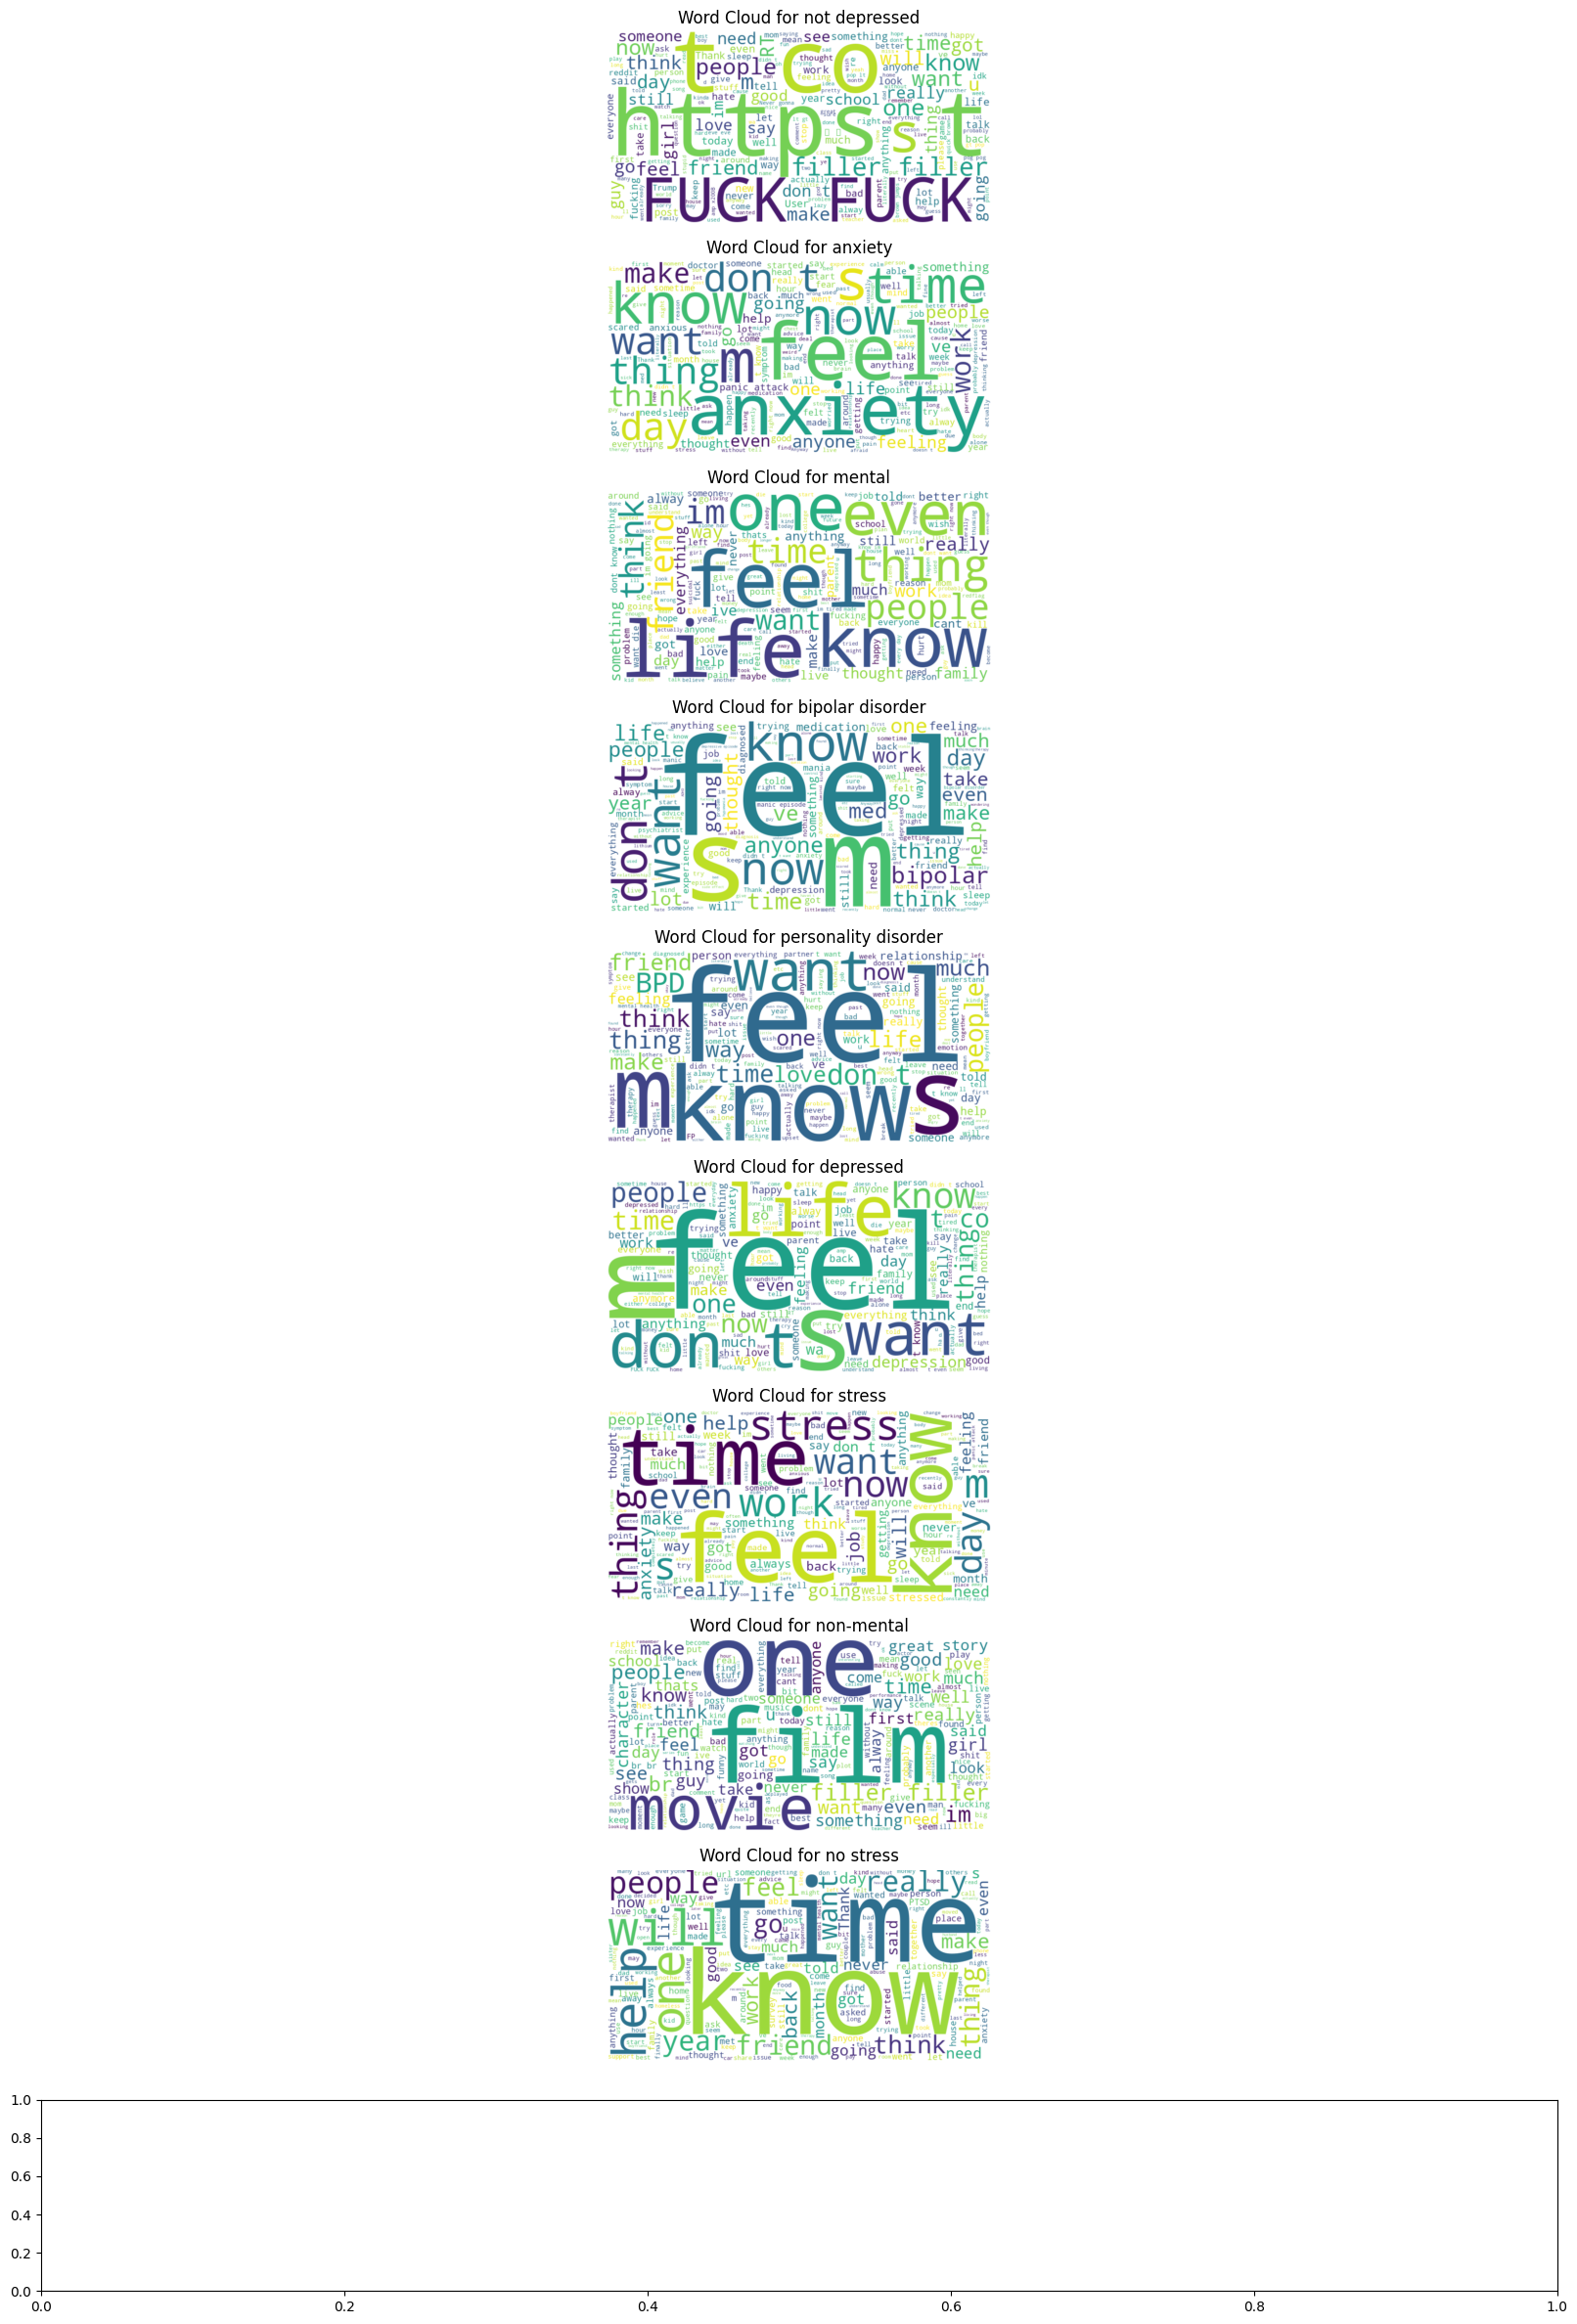

In [ ]:
labels = Data['label'].unique()
plt.figure(figsize=(20, 30))

for i, label in enumerate(labels):
    plt.subplot(len(labels), 1, i + 1)
    text = ' '.join(Data[Data['label'] == label]['text'].astype(str))
    print(f"Label: {label}, Length of text: {len(text)}")  # Debug statement
    if len(text) == 0:
        print(f"Skipping label {label} as it has no text.")
        continue
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label}')
    plt.axis('off')

plt.show()

In [ ]:
empty_labels = []
for label in Data['label'].unique():
    if Data[Data['label'] == label]['text'].str.strip().eq('').sum() > 0:
        empty_labels.append(label)

print(f"Labels with empty texts: {empty_labels}")

Labels with empty texts: []


<ipython-input-21-39e3fc209f4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['text_length'] = Data['text'].apply(lambda x: len(x.split()))


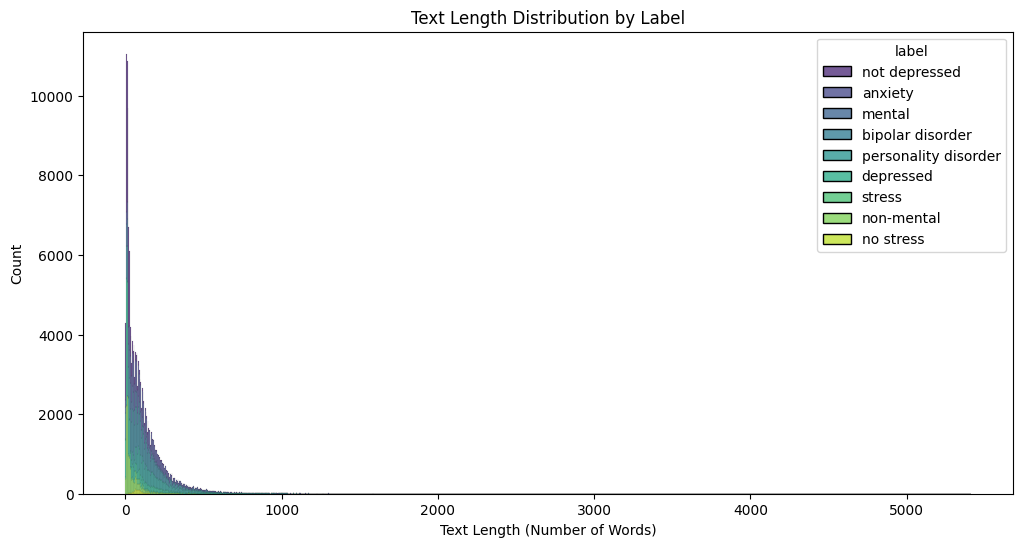

In [ ]:
Data['text_length'] = Data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=Data, x='text_length', hue='label', multiple='stack', palette='viridis')
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.show()

In [ ]:
#Data = Data.drop(columns=['text_length'])

In [ ]:
Data.shape

(162578, 2)

Implementaion Part

In [ ]:
!pip install text_hammer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully uninstalled beautifulsoup4-4.12.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.41 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


In [ ]:
import text_hammer as th
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tqdm import tqdm_notebook

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
lists = stopwords.words('english')

In [ ]:
stopwords_list = stopwords.words('english') + [
    'i', 'am', 'is', 'are', 'this', 'that', 'then', 'those', 'have', 'has', 'it', 'can', 'could', 'the',
    'had', 'was', 'were', 'been', 'them', 'what', 'yet', 'though', 'wherein', 'really', 'show', 'then',
    'rather', 'same', 'con', 'call', 'is', 'twenty', 'side', 'go', 'namely', 'every', 'top', 'for', "'m",
    'with', 'either', 'because', 'two', 'well', 'when', 'those', 'under', 'thin', 'amount', 'upon', 'kg',
    'the', "that'll", 'ca', 'even', 'very', 'into', 'by', '‘m', 'keep', 'although', 'done', 'bottom', 'detail',
    'whatever', 'from', 'formerly', 'these', 'enough', 'twelve', 'of', 'too', 'already', 'move', 'something',
    'few', 'nothing', 'they', 'does', 'us', 'next', 'cry', 'but', 'eight', '‘s', 'however', 'four', "'ll",
    'has', 'over', 'someone', 'afterwards', 'myself', 'have', 'would', 'anywhere', 'hereupon', 'using',
    'everything', 'his', 'put', 'many', 'more', 'within', 'which', 'describe', 'thereby', 'nine',
    'elsewhere', 'other', 'he', 'if', 'per', 'your', 's', 'be', 'than', 'now', 'sometime', 'herein', 'why',
    '‘d', 'whereas', 'behind', 'couldnt', 'de', "'re", 'least', 'latter', 'whereafter', 'part', 'after',
    'front', 'interest', "you'd", 'whose', 'fire', 'sincere', 'down', 'to', 'whence', 'ours', "'s", 'all',
    'noone', 'just', 'anyhow', 'ie', 'having', 'her', 'been', 'get', 'former', 'throughout', 'above', '’d',
    'cannot', 'almost', 'do', 'quite', 'seem', 'give', 'first', 'several', 'also', 'seems', 'became', '’m',
    'sixty', 'anyway', '‘re', 'on', "you're", 'onto', 'co', 'third', 'fifty', 'had', 'seemed', '’s',
    'yourselves', 'until', 'an', 'mine', 'across', 'sometimes', 'hereby', 'eleven', 'might', 'mostly',
    'un', 'i', "'d", 'itself', 'most', 'beforehand', 'five', 'beyond', 'herself', "you've", 'unless',
    'regarding', 'there', 'doesn', 'while', 'whoever', "should've", 'whereupon', 'name', 'further', 'o',
    'nobody', 'whereby', 'others', 'between', 'thus', 'any', "you'll", 'found', 'amongst', 'hers',
    'wherever', 'ltd', 'still', 'somehow', 'often', 'km', 'becoming', 'six', 'can', "'ve", 'make', 'hence',
    'around', 'both', 'our', 'along', 'latterly', 'please', 'via', 'whole', 'system', 've', 'd', 'you',
    'themselves', 'here', 'used', 'in', 'forty', 'each', 'find', 'during', 'ain', 'ten', 'him',
    'nevertheless', "she's", 'me', 'them', 'ma', 'meanwhile', 'and', 'y', 'did', 'fifteen', 'serious',
    '’re', "it's", '’ll', 'that', 'alone', 'together', 'where', 'hereafter', 'once', 'himself', 'could',
    'made', 'among', 'whom', 'cant', 'doing', 'again', 'therefore', 'beside', 'hundred', 'three', 'etc',
    'moreover', 'various', 'may', 'since', 'always', 'seeming', 'toward', 'are', 'll', 'everywhere', 'a',
    'empty', 'yours', 'theirs', 'back', 'else', 'own', 'as', 'somewhere', 'bill', '‘ll', 're', 'through',
    'last', 'nowhere', 'what', 'take', 'computer', 'yourself', 'eg', 'perhaps', 'thereupon', 'ourselves',
    'against', 'inc', 'she', 'whether', 'their', 'm', 'such', 'thick', 'anything', '’ve', 'neither',
    'none', 'amoungst', 'one', 'were', 'thru', 'am', 'about', 'without', 'up', 'otherwise', 'except',
    'who', 'due', 'thereafter', 'ever', 'much', 'out', 'how', 'whenever', 'before', 'it', 'some', 'being',
    'mill', 'or', 'its', 'will', 'become', 'besides', 'say', 'therein', 'another', 'see', 'anyone',
    'becomes', 'never', 'towards', 'everyone', 'below', 'full', 'my', 'only', 'fill', 'we', 'should',
    'thence', 'indeed', 'this', 'was', 'less', 'so', 't', 'at', 'must', 'whither', 'off'
]

In [ ]:
def remove_stopwords(text):
    token = word_tokenize(text)
    token_without_stopwords = [word for word in token if word not in stopwords_list]
    text = " ".join(token_without_stopwords)
    return text

In [ ]:
Data['text'] = Data['text'].apply(remove_stopwords)
Data.head()

,text,label
0,Cocaine vs butthole 1v1 & amp ; # x200B ; Who win,not depressed
1,She depressed lately tired I feel ’ fault . Sh...,anxiety
2,hate level nowi good day today time awhile occ...,mental
3,I bipolar disorder hopping jobs endless cycle ...,bipolar disorder
4,"I wan na fuck milf . Is bad ? Like , I know I ...",not depressed


In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
def text_preprocessing(df, col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x: str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return df

In [ ]:
Data = text_preprocessing(Data, 'text')

  0%|          | 0/162578 [00:00<?, ?it/s]

  0%|          | 0/162578 [00:00<?, ?it/s]

  0%|          | 0/162578 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


  0%|          | 0/162578 [00:00<?, ?it/s]

  0%|          | 0/162578 [00:00<?, ?it/s]

In [ ]:
X = Data['text']
y = Data['label']

In [ ]:
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200, padding='post')

In [ ]:
X[0]

array([4825, 2409,  132,  545, 1643, 1679,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
X.shape

(162578, 200)

In [ ]:
label_mapping = {label: idx for idx, label in enumerate(Data['label'].unique())}
y = Data['label'].map(label_mapping)
y = to_categorical(y, num_classes=len(label_mapping))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
glove_gensim = api.load('glove-wiki-gigaword-100')

vector_size = 100
num_words = 10000
gensim_weight_matrix = np.zeros((num_words, vector_size))

for word, index in tokenizer.word_index.items():
    if index < num_words:
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(vector_size)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=EMBEDDING_DIM,
                    input_length=X.shape[1],
                    weights=[gensim_weight_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNGRU(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNGRU(100, return_sequences=False)))
model.add(Dense(len(label_mapping), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 200, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 200, 200)          121200    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 200, 200)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               181200    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 10)                2

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
pip install --upgrade pip setuptools wheel

In [ ]:
pip install tensorflow-gpu

In [ ]:
history_embedding = model.fit(X_train, y_train,
                              epochs=25, batch_size=128,
                              validation_data=(X_test, y_test),
                              verbose=1, callbacks=[es, mc])

Epoch 1/25
1017/1017 [==============================] - ETA: 0s - loss: 0.9742 - accuracy: 0.6471
Epoch 1: val_accuracy improved from -inf to 0.71983, saving model to model.h5
1017/1017 [==============================] - 54s 48ms/step - loss: 0.9742 - accuracy: 0.6471 - val_loss: 0.7707 - val_accuracy: 0.7198
Epoch 2/25
   1/1017 [..............................] - ETA: 42s - loss: 0.7529 - accuracy: 0.7109

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1016/1017 [============================>.] - ETA: 0s - loss: 0.7676 - accuracy: 0.7227
Epoch 2: val_accuracy improved from 0.71983 to 0.74167, saving model to model.h5
1017/1017 [==============================] - 51s 50ms/step - loss: 0.7676 - accuracy: 0.7227 - val_loss: 0.7133 - val_accuracy: 0.7417
Epoch 3/25
1017/1017 [==============================] - ETA: 0s - loss: 0.7145 - accuracy: 0.7419
Epoch 3: val_accuracy improved from 0.74167 to 0.74972, saving model to model.h5
1017/1017 [==============================] - 52s 51ms/step - loss: 0.7145 - accuracy: 0.7419 - val_loss: 0.6928 - val_accuracy: 0.7497
Epoch 4/25
1017/1017 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.7533
Epoch 4: val_accuracy improved from 0.74972 to 0.75637, saving model to model.h5
1017/1017 [==============================] - 51s 51ms/step - loss: 0.6819 - accuracy: 0.7533 - val_loss: 0.6741 - val_accuracy: 0.7564
Epoch 5/25
1016/1017 [============================>.] - ETA: 0s - los

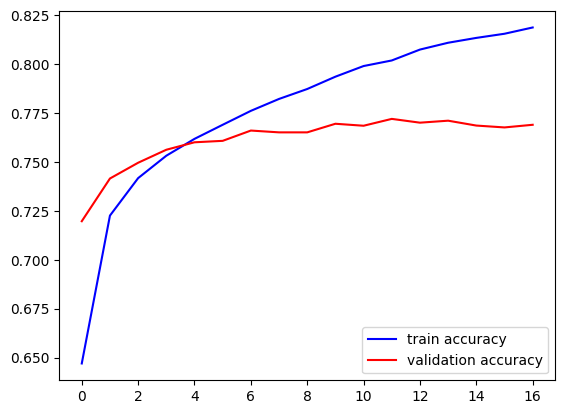

In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

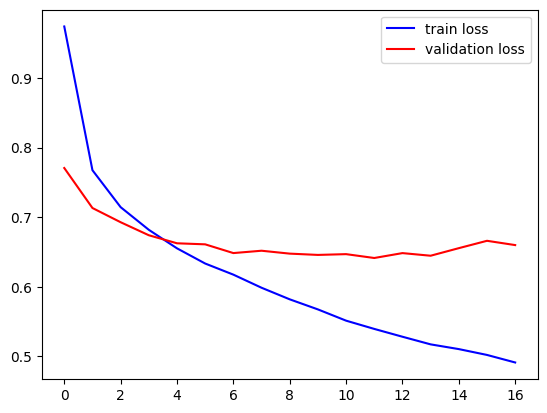

In [ ]:
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Ensure y_test is a NumPy array
y_test = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1017/1017 [==============================] - 12s 12ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      4390
           1       0.82      0.80      0.81      5873
           2       0.84      0.86      0.85      2767
           3       0.84      0.80      0.82      7343
           4       0.79      0.77      0.78      4311
           5       0.61      0.67      0.64      4216
           6       0.43      0.39      0.41       517
           7       0.82      0.80      0.81      2828
           8       0.53      0.35      0.42       270
           9       0.00      0.00      0.00         1

    accuracy                           0.77     32516
   macro avg       0.64      0.62      0.63     32516
weighted avg       0.77      0.77      0.77     32516



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'labels' is not defined

<Figure size 1000x800 with 0 Axes>